<table width="100%" align="centre">
    <tr>
        <td><img align ="centre" src="../images/bazinga.png" width="30%" /></td>
    </tr>
</table>

## <font color=red>GUILLEM MIRABENT RUBINAT, Exercise: US unemployment and crime</font>

1. Create a basic b/w map of US, showing only the states. Print also the name of the states at the center of each state.

> `library("dplyr", quietly = TRUE)`<br/>
> `library("maps", quietly = TRUE)`<br/>
> `library("mapproj", quietly = TRUE)`<br/>
> `library("ggplot2", quietly = TRUE)`<br/>
> `library("tidyverse", quietly = TRUE)`<br/>
> `library("viridis", quietly = TRUE)`<br/>
> <br/>
> `us_states_map = map_data("state")`<br/>
> `us_county_map = map_data("county")`

2. Add a layer with the county borders, colored gray and semi-transparent.
3. Fetch the U.S. Unemployment data (year 2009) and combine it with your county map. Hint: you will need to convert your state names to their abbreviations before you combine the two dataframes, and that you order your final dataframe.
> `https://www.rdocumentation.org/packages/astsa/versions/1.14/topics/unemp`<br/>
> `data("unemp")`<br/>
> `...`<br/>
> `us_county_map$state = state.abb[match(us_county_map$state, tolower(state.name))]`<br/>
> `...`<br/>
> `us_map_unemp = us_map_unemp[order(us_map_unemp$order), ]`

4. Create a choropleth map of US, divided by geographical areas (states, counties) that are coloured (the counties) in relation to the unemployment rate.

5. Fetch from the homicide dataset the data for 2009.
> `homicide = read.csv("../data/homicide.csv")`

6. Aggregate the homicide cases (rows) per state (you can either keep the raw counts or convert them to percentages over the total homicides recorded across the country.

7. After you perform a join of your us map with the homicide data by `"regions"`, create a choropleth map of US, divided by geographical areas (states, counties) that are coloured (the counties) in relation to the homicide rate.

8. If possible using facetting (or some other method) to put the two maps side by side and compare the data.

In [110]:
library("dplyr", quietly = TRUE)
library("maps", quietly = TRUE)
library("mapproj", quietly = TRUE)
library("ggplot2", quietly = TRUE)
library("tidyverse", quietly = TRUE)
library("viridis", quietly = TRUE)
library("ggrepel", quietly = TRUE)
library("gridExtra", quietly = TRUE)
library("patchwork", quietly = TRUE)

In [111]:
# I created the palette on coolors.co and then I used the colorblind filter to check if it was 
# colorblind friendly. For most color blindness types, the palette is completely fine.
# The only exception is monochromacy, for which the palette might pose some difficulties. But it is VERY
# difficullt to account for monochromacy (not even viridis does). Additionally, it is a very rare condition.
#Guillems_accessible_palette = c("#9B2915", "#FFA69E", "#FFE66D", "#033F63", "#80A4ED", "#4B4D68", "#71B48D")
Guillems_accessible_palette = c("#bffbff", "#fff126", "#f0a030", "#c21d00", "#033F63", "#68D8D6", "#80A4ED", "#4B4D68", "#71B48D")
Guillems_accessible_palette_2 = c("#80A4ED", "#4B4D68", "#FFA69E", "#D55E00", "#0072B2", "#E69F00", "#CC79A7", "#999999", "#9B2915", "#033F63", "#fff494", "#68D8D6")

region      mean_lon   mean_lat
1 alabama      -86.85342 31.66372
2 arizona     -113.27464 34.52859
3 arkansas     -91.28040 34.63297
4 california  -120.70642 36.71313
5 colorado    -105.07031 38.58087
6 connecticut  -72.72006 41.38260

[1] 49

Warning message:
"ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


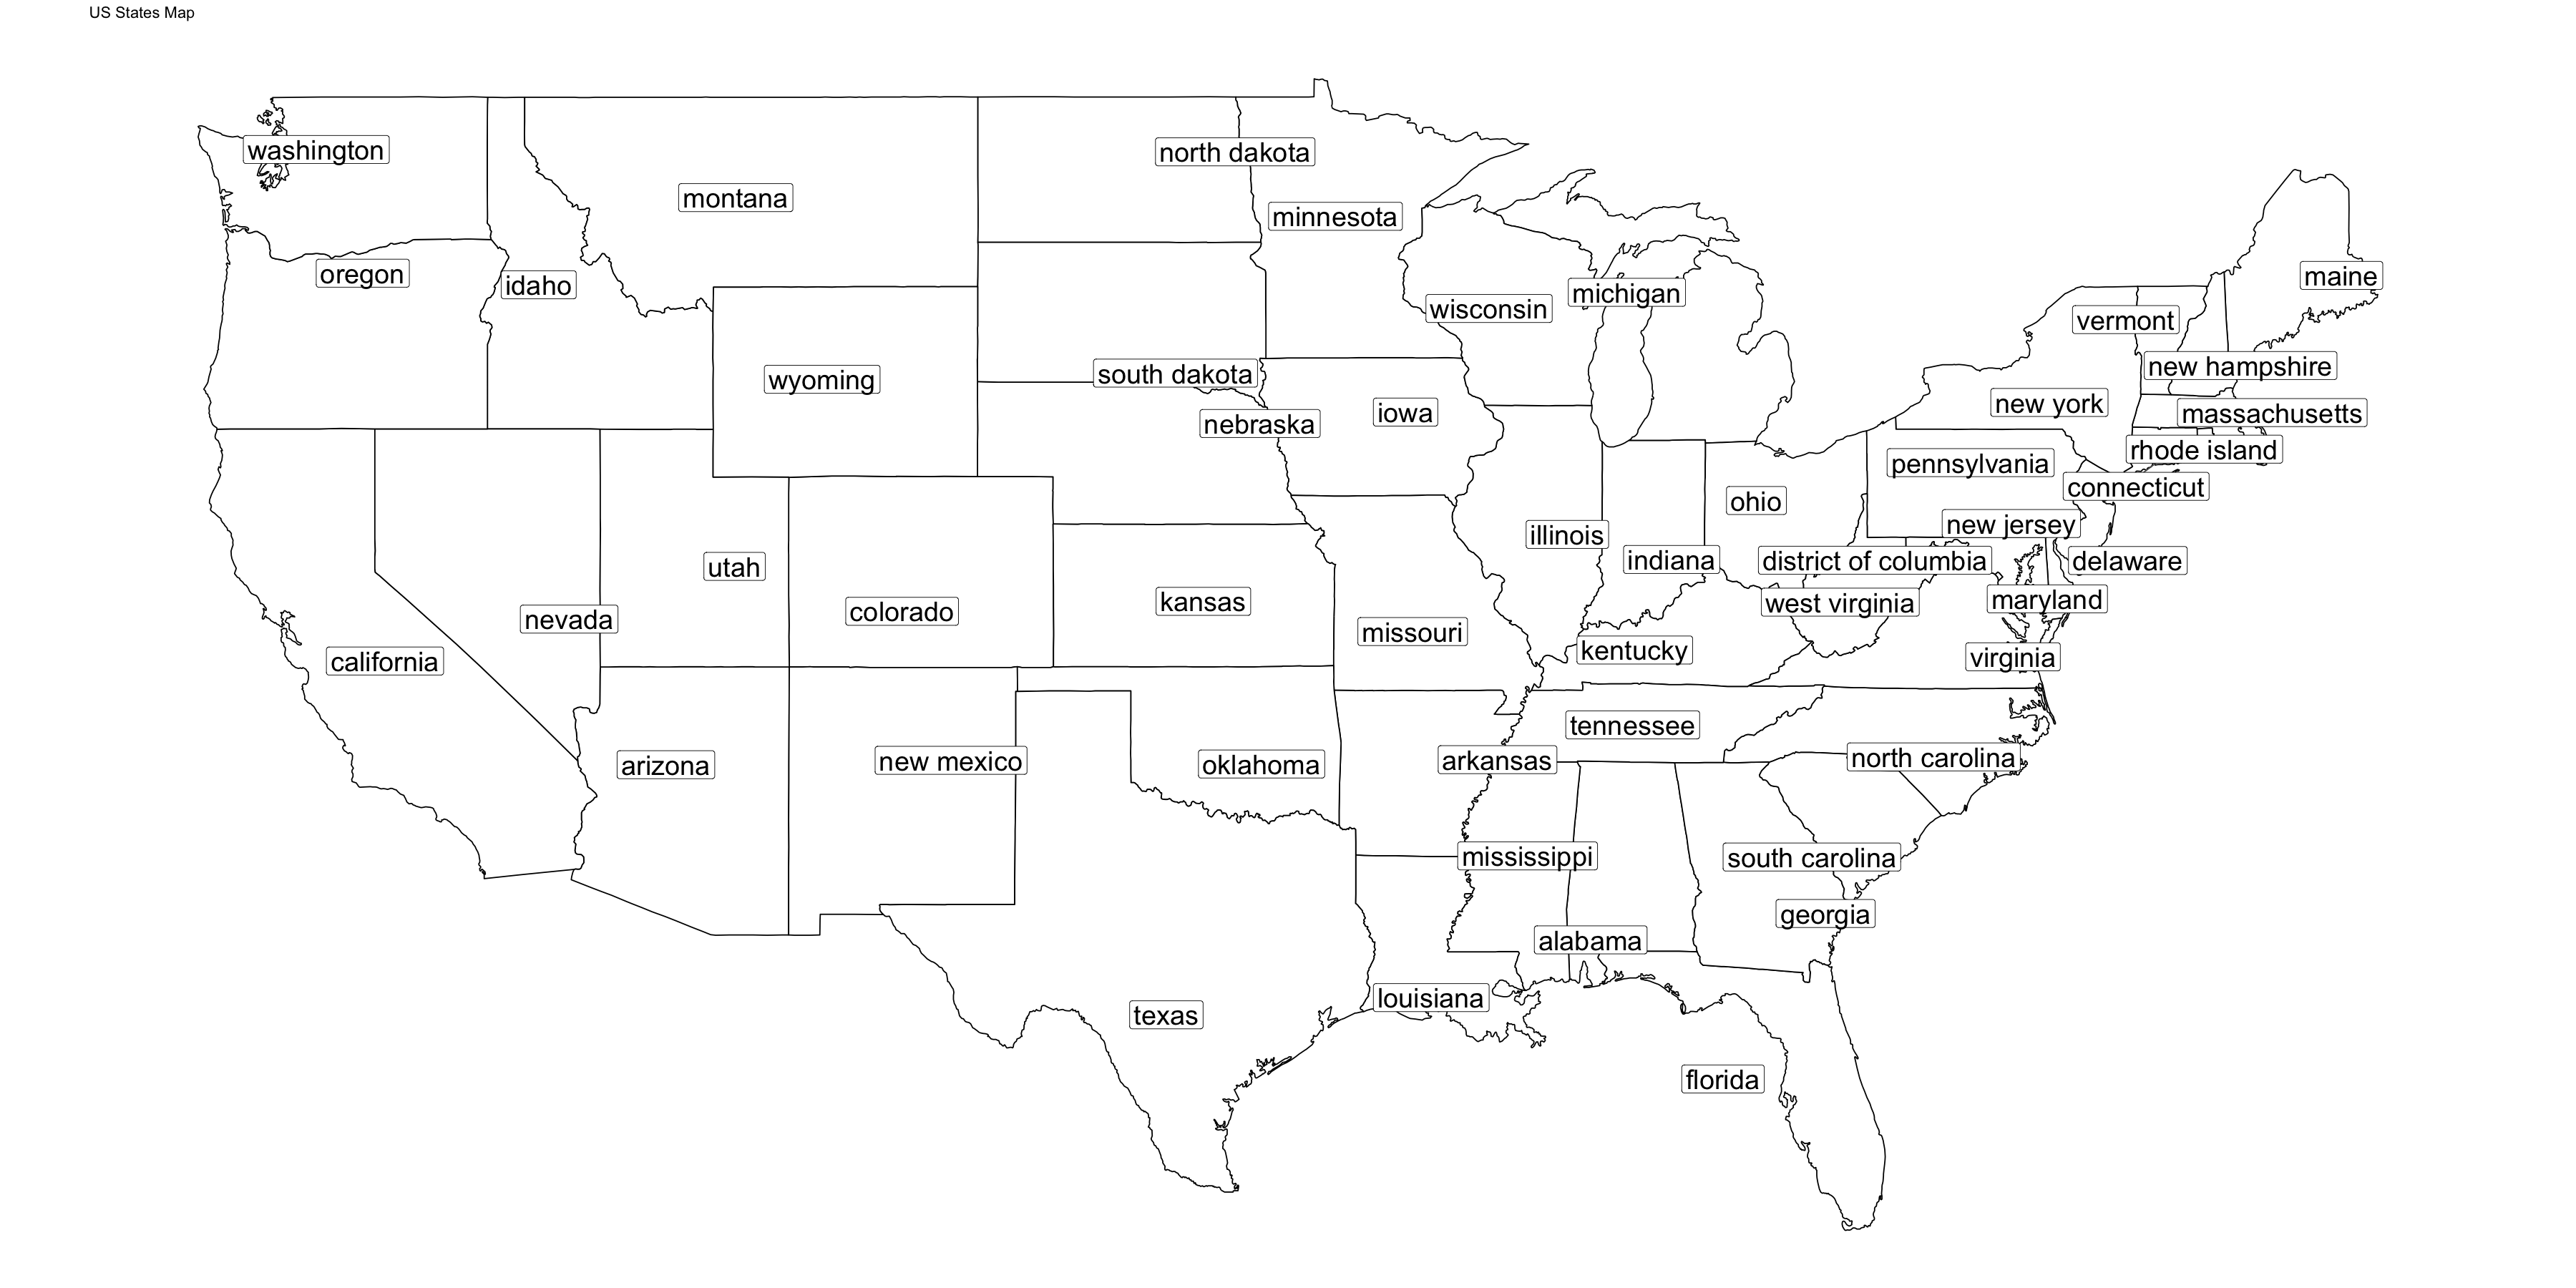

In [112]:
us_states_map = map_data("state")
us_county_map = map_data("county")

state_coords = us_states_map %>%
    group_by(region) %>%
    summarize(mean_lon = mean(long, na.rm = TRUE), mean_lat = mean(lat, na.rm = TRUE))

head(state_coords)

num_states = length(unique(us_states_map$region))
num_states

options(repr.plot.width = 30, repr.plot.height = 15)

ggplot() + 
    geom_polygon(data = us_states_map, aes(x = long, y = lat, group = group), color = "black", fill = "white") +
    geom_label_repel(data = state_coords, 
            aes(x = mean_lon, y = mean_lat, label = region),
            size = 8,
            box.padding = 0.25,
            point.padding = 0.5,
            segment.color = '#5b5b5b',
            fill = 'white',
            color = "black") +
    labs(title = "US States Map") + 
    theme_void() +
    coord_quickmap()

Warning message:
"ggrepel: 22 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


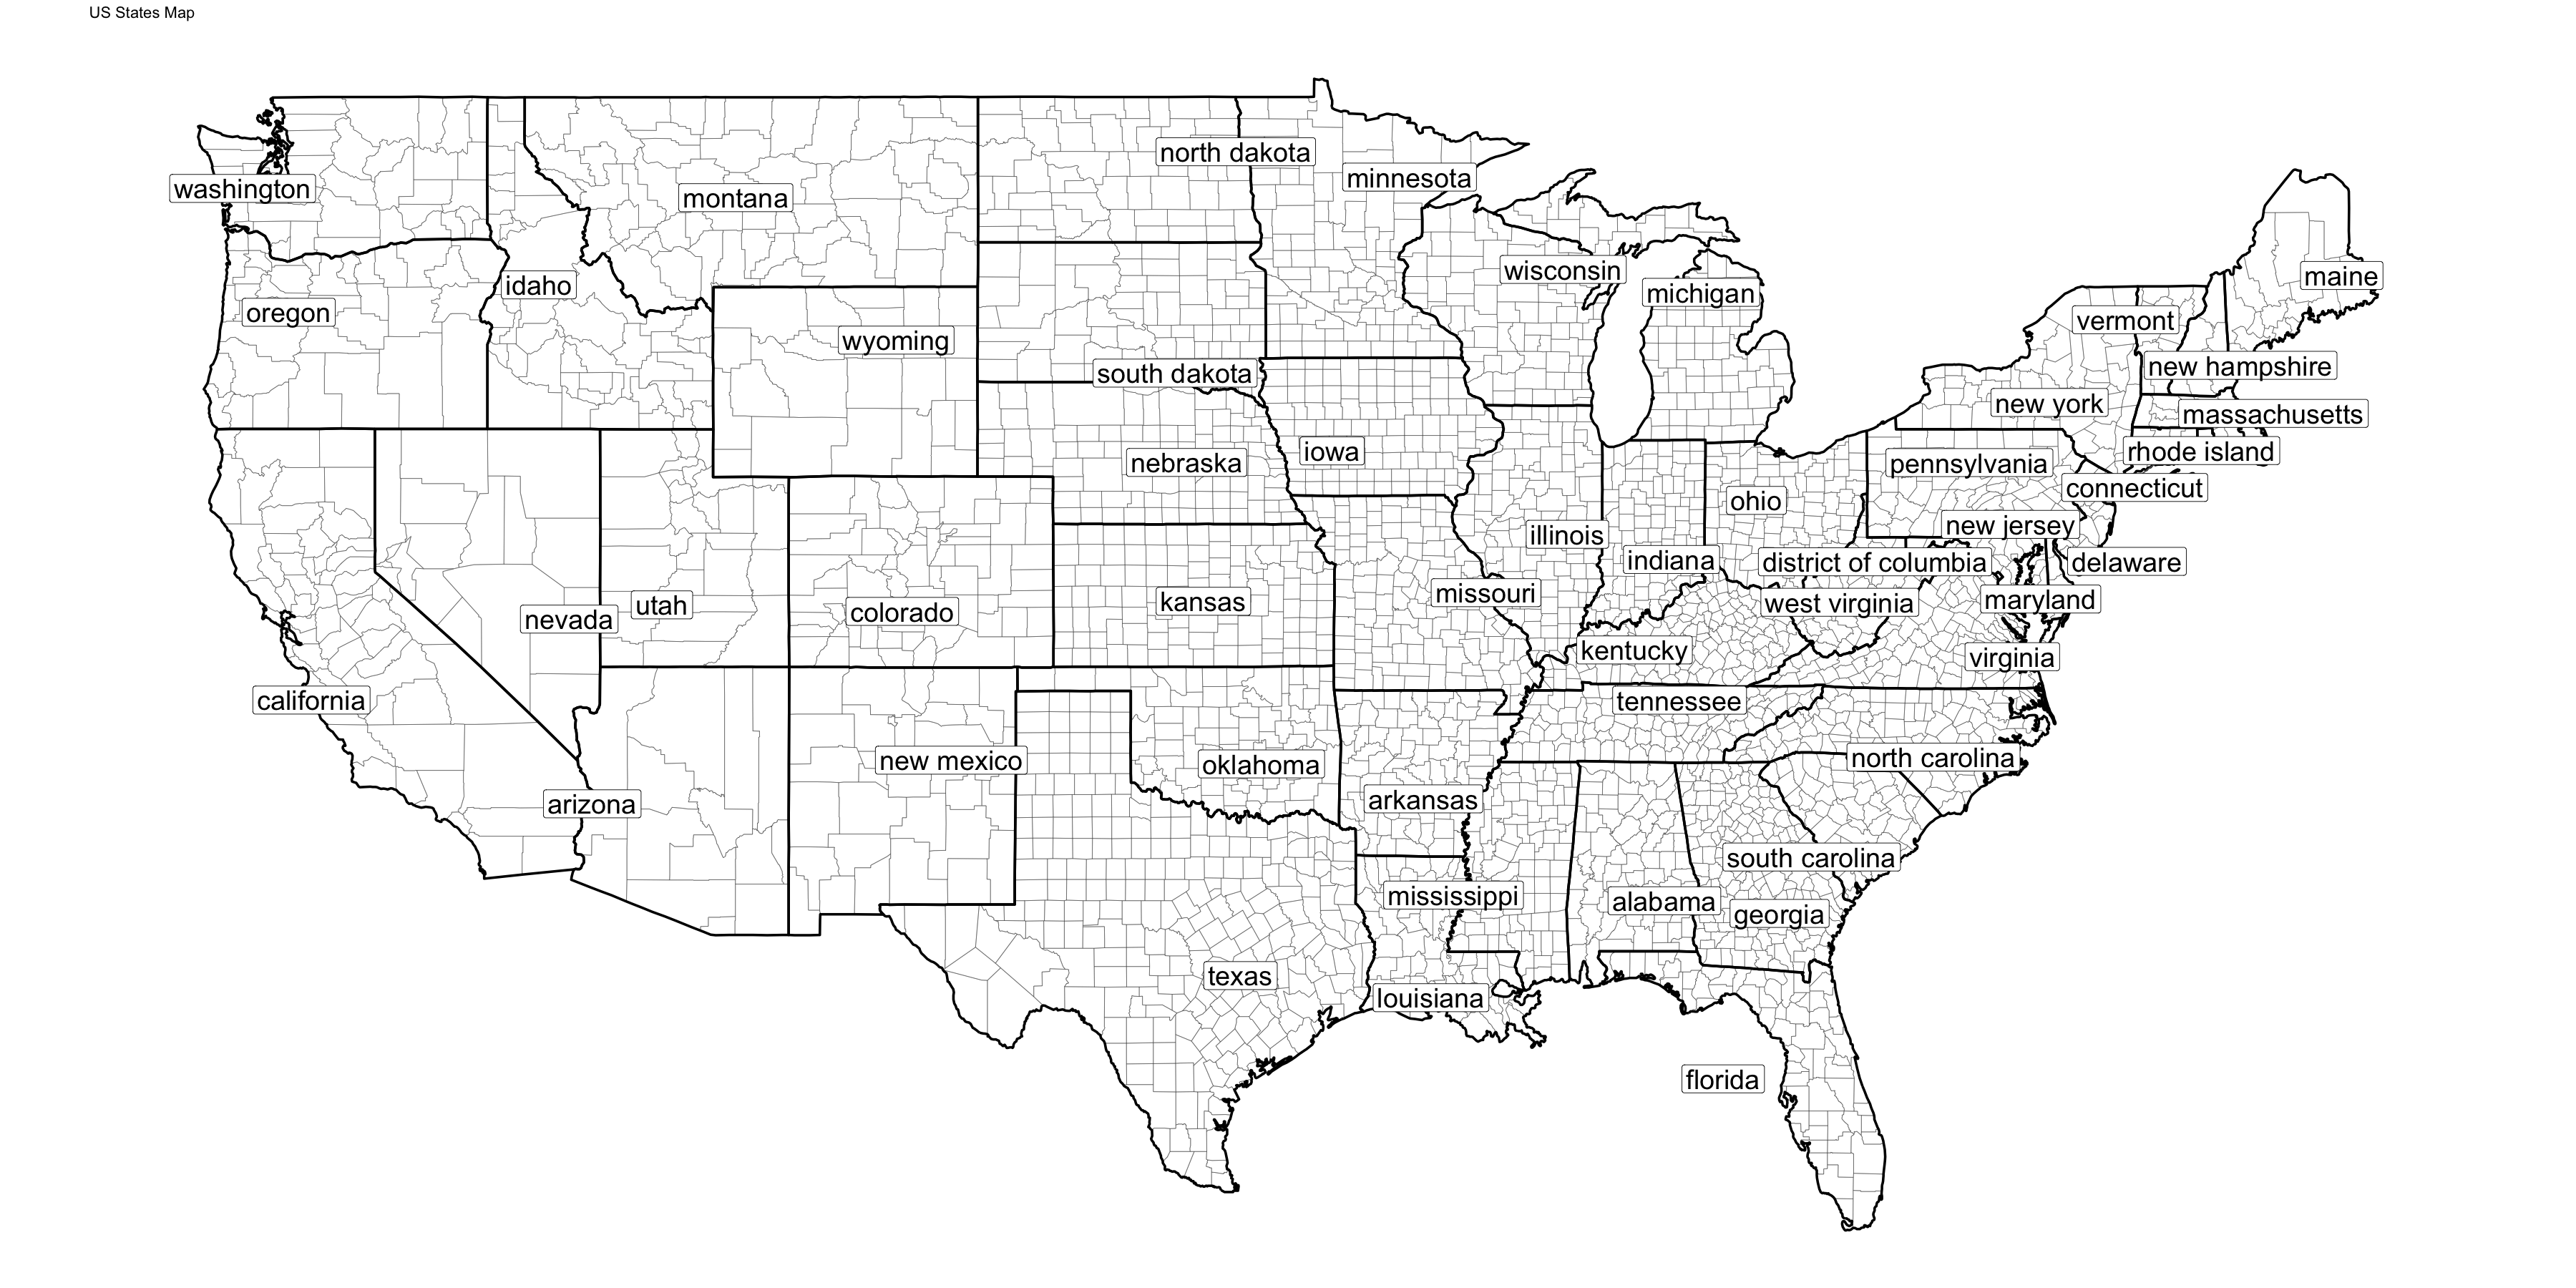

In [113]:
options(repr.plot.width = 30, repr.plot.height = 15)

ggplot() + 
    geom_polygon(data = us_county_map, aes(x = long, y = lat, group = group), color = "#44444487", fill = NA, lwd = 0.25) +
    geom_polygon(data = us_states_map, aes(x = long, y = lat, group = group), color = "black", fill = NA, lwd = 1) +
    theme_void() +
    coord_quickmap() +
    geom_label_repel(data = state_coords, 
            aes(x = mean_lon, y = mean_lat, label = region),
            size = 8,
            box.padding = 0.25,
            point.padding = 0.5,
            segment.color = '#5b5b5b',
            fill = 'white',
            color = "black") +
    labs(title = "US States Map") 

Warning message:
"ggrepel: 35 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


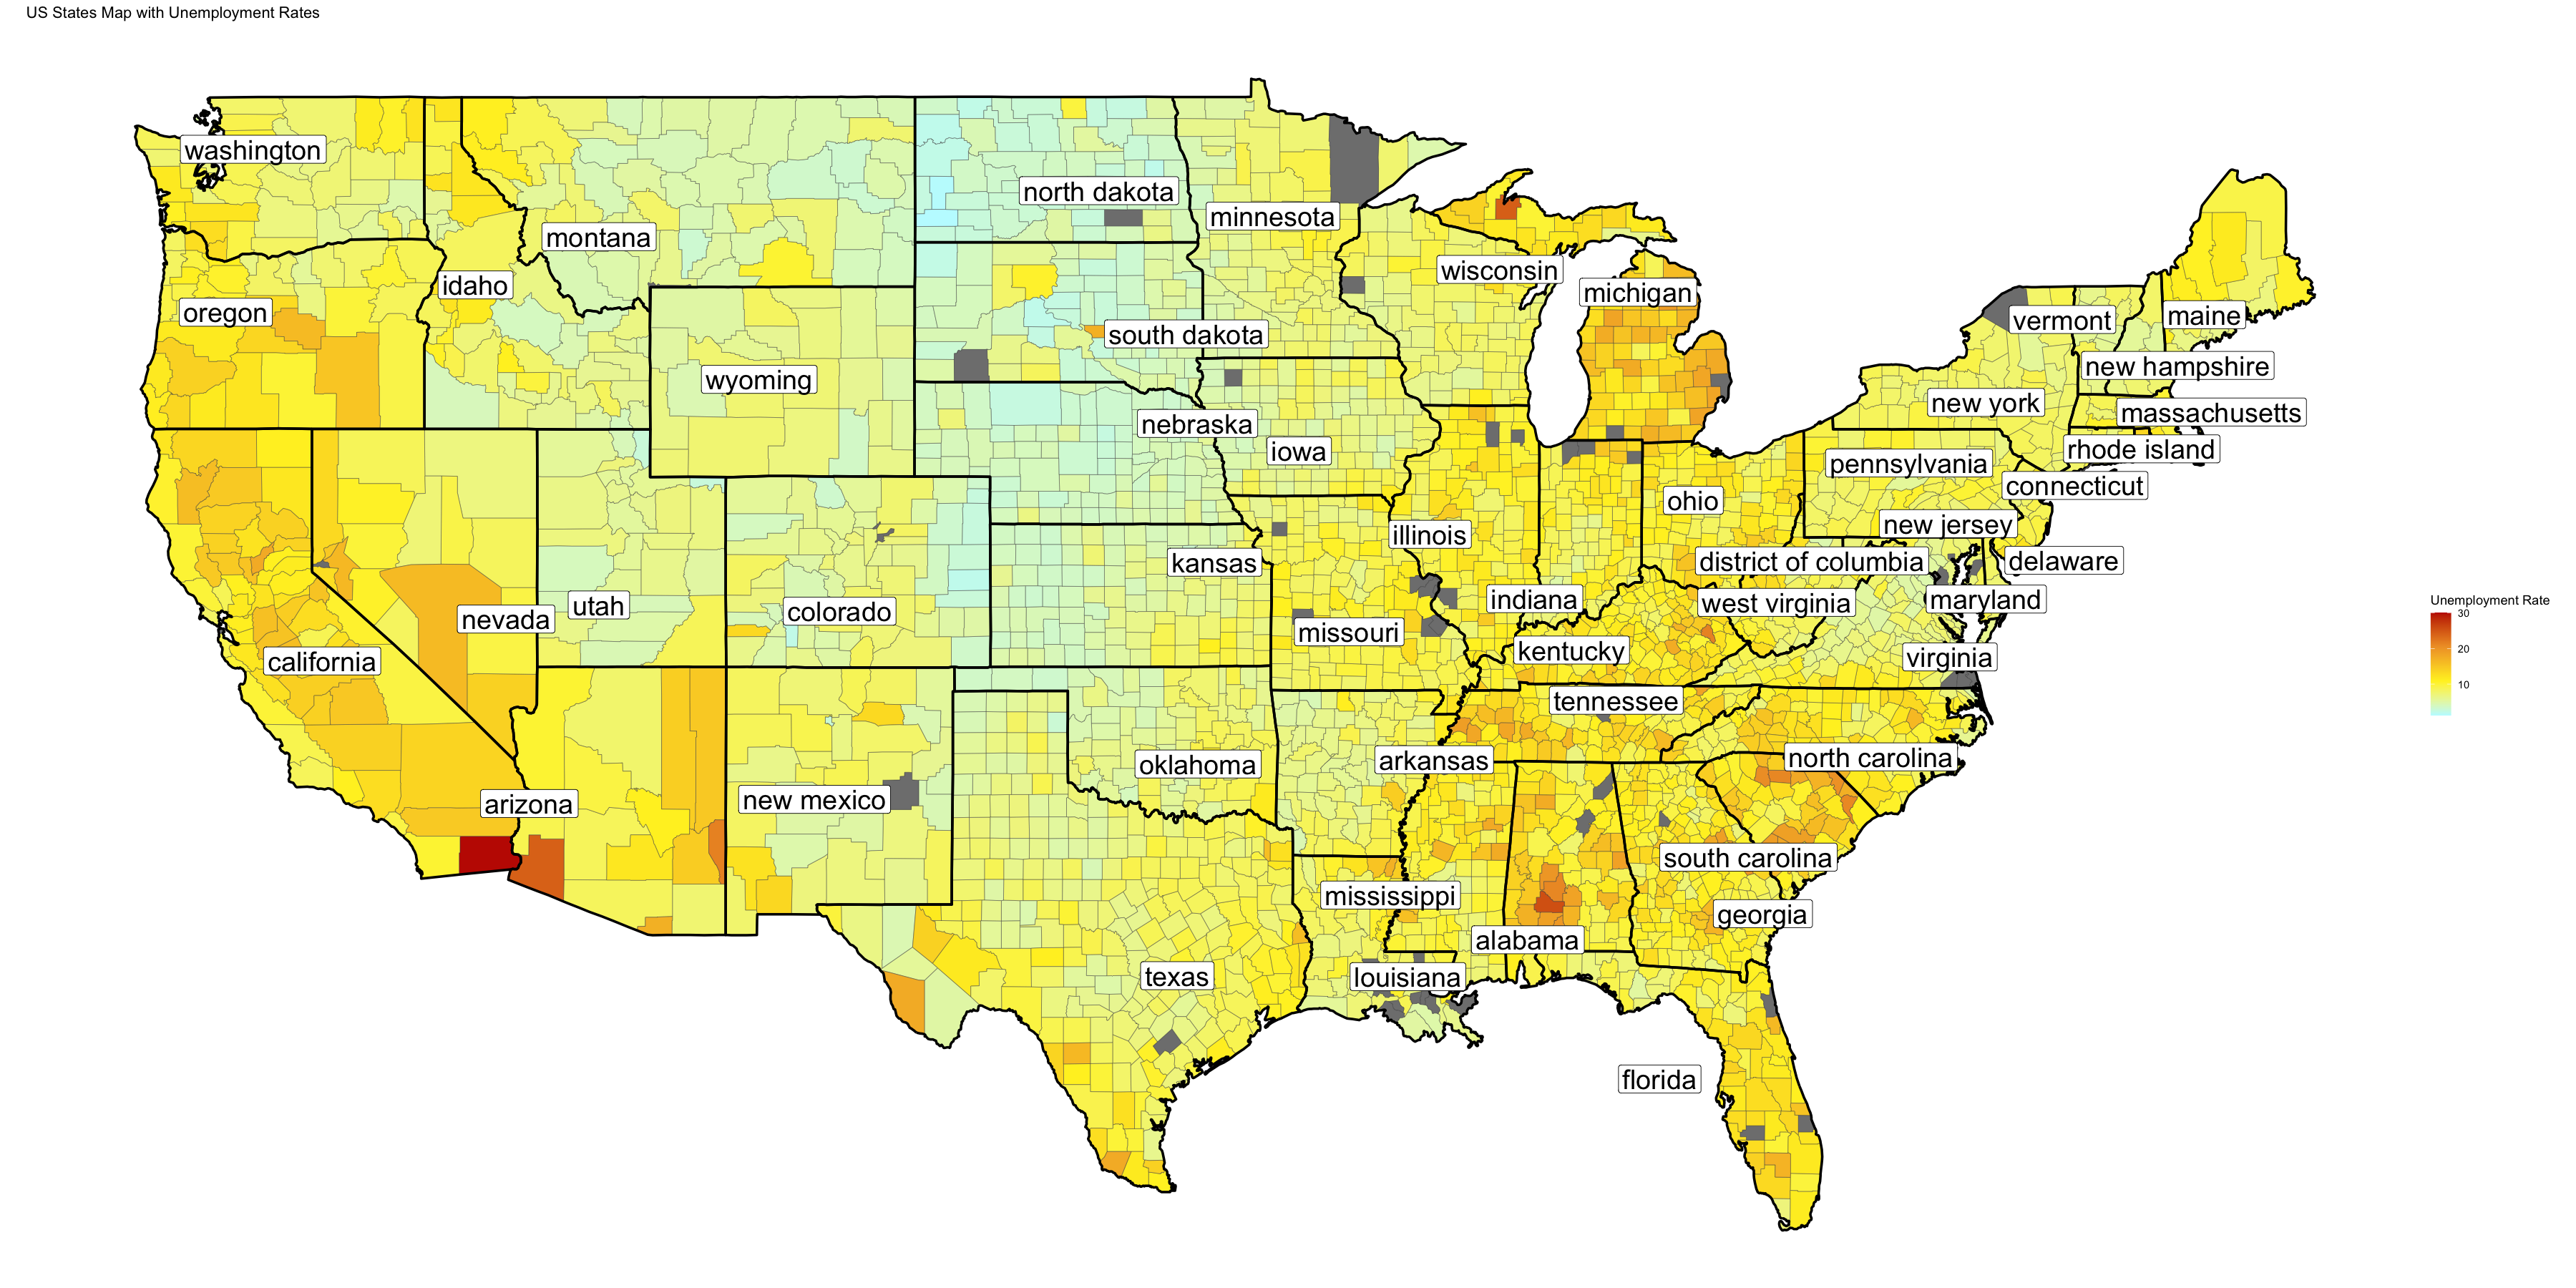

In [114]:
us_county_map$state = state.abb[match(us_county_map$region, tolower(state.name))]

# head(us_county_map)

us_map_unemp = left_join(us_county_map, unemp, by = c("subregion" = "county", "state" = "state"))

# head(us_map_unemp)

us_map_unemp = us_map_unemp[order(us_map_unemp$order), ]

# head(us_map_unemp)

options(repr.plot.width = 30, repr.plot.height = 15)

ggplot() +
    geom_polygon(data = us_map_unemp,
                aes(x = long, y = lat, group = group, fill = rate),
                color = "#44444487", lwd = 0.25) +
    geom_polygon(data = us_states_map,
                aes(x = long, y = lat, group = group), 
                color = "black", fill = NA, lwd = 1) +
    scale_fill_gradientn(colours = Guillems_accessible_palette[1:4],
                        name = "Unemployment Rate") +
    theme_void() +
    coord_quickmap() +
    geom_label_repel(data = state_coords, 
                    aes(x = mean_lon, y = mean_lat, label = region),
                    size = 8,
                    box.padding = 0.25,
                    point.padding = 0.5,
                    segment.color = '#5b5b5b',
                    fill = 'white',
                    color = "black") +
    labs(title = "US States Map with Unemployment Rates")

State      n    perc       
1 Alabama     318 0.020075758
2 Alaska       36 0.002272727
3 Arizona     370 0.023358586
4 Arkansas    173 0.010921717
5 California 2132 0.134595960
6 Colorado    165 0.010416667

long      lat      group order region  subregion n   perc      
1 -87.46201 30.38968 1     1     Alabama NA        318 0.02007576
2 -87.48493 30.37249 1     2     Alabama NA        318 0.02007576
3 -87.52503 30.37249 1     3     Alabama NA        318 0.02007576
4 -87.53076 30.33239 1     4     Alabama NA        318 0.02007576
5 -87.57087 30.32665 1     5     Alabama NA        318 0.02007576
6 -87.58806 30.32665 1     6     Alabama NA        318 0.02007576

Warning message:
"ggrepel: 45 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


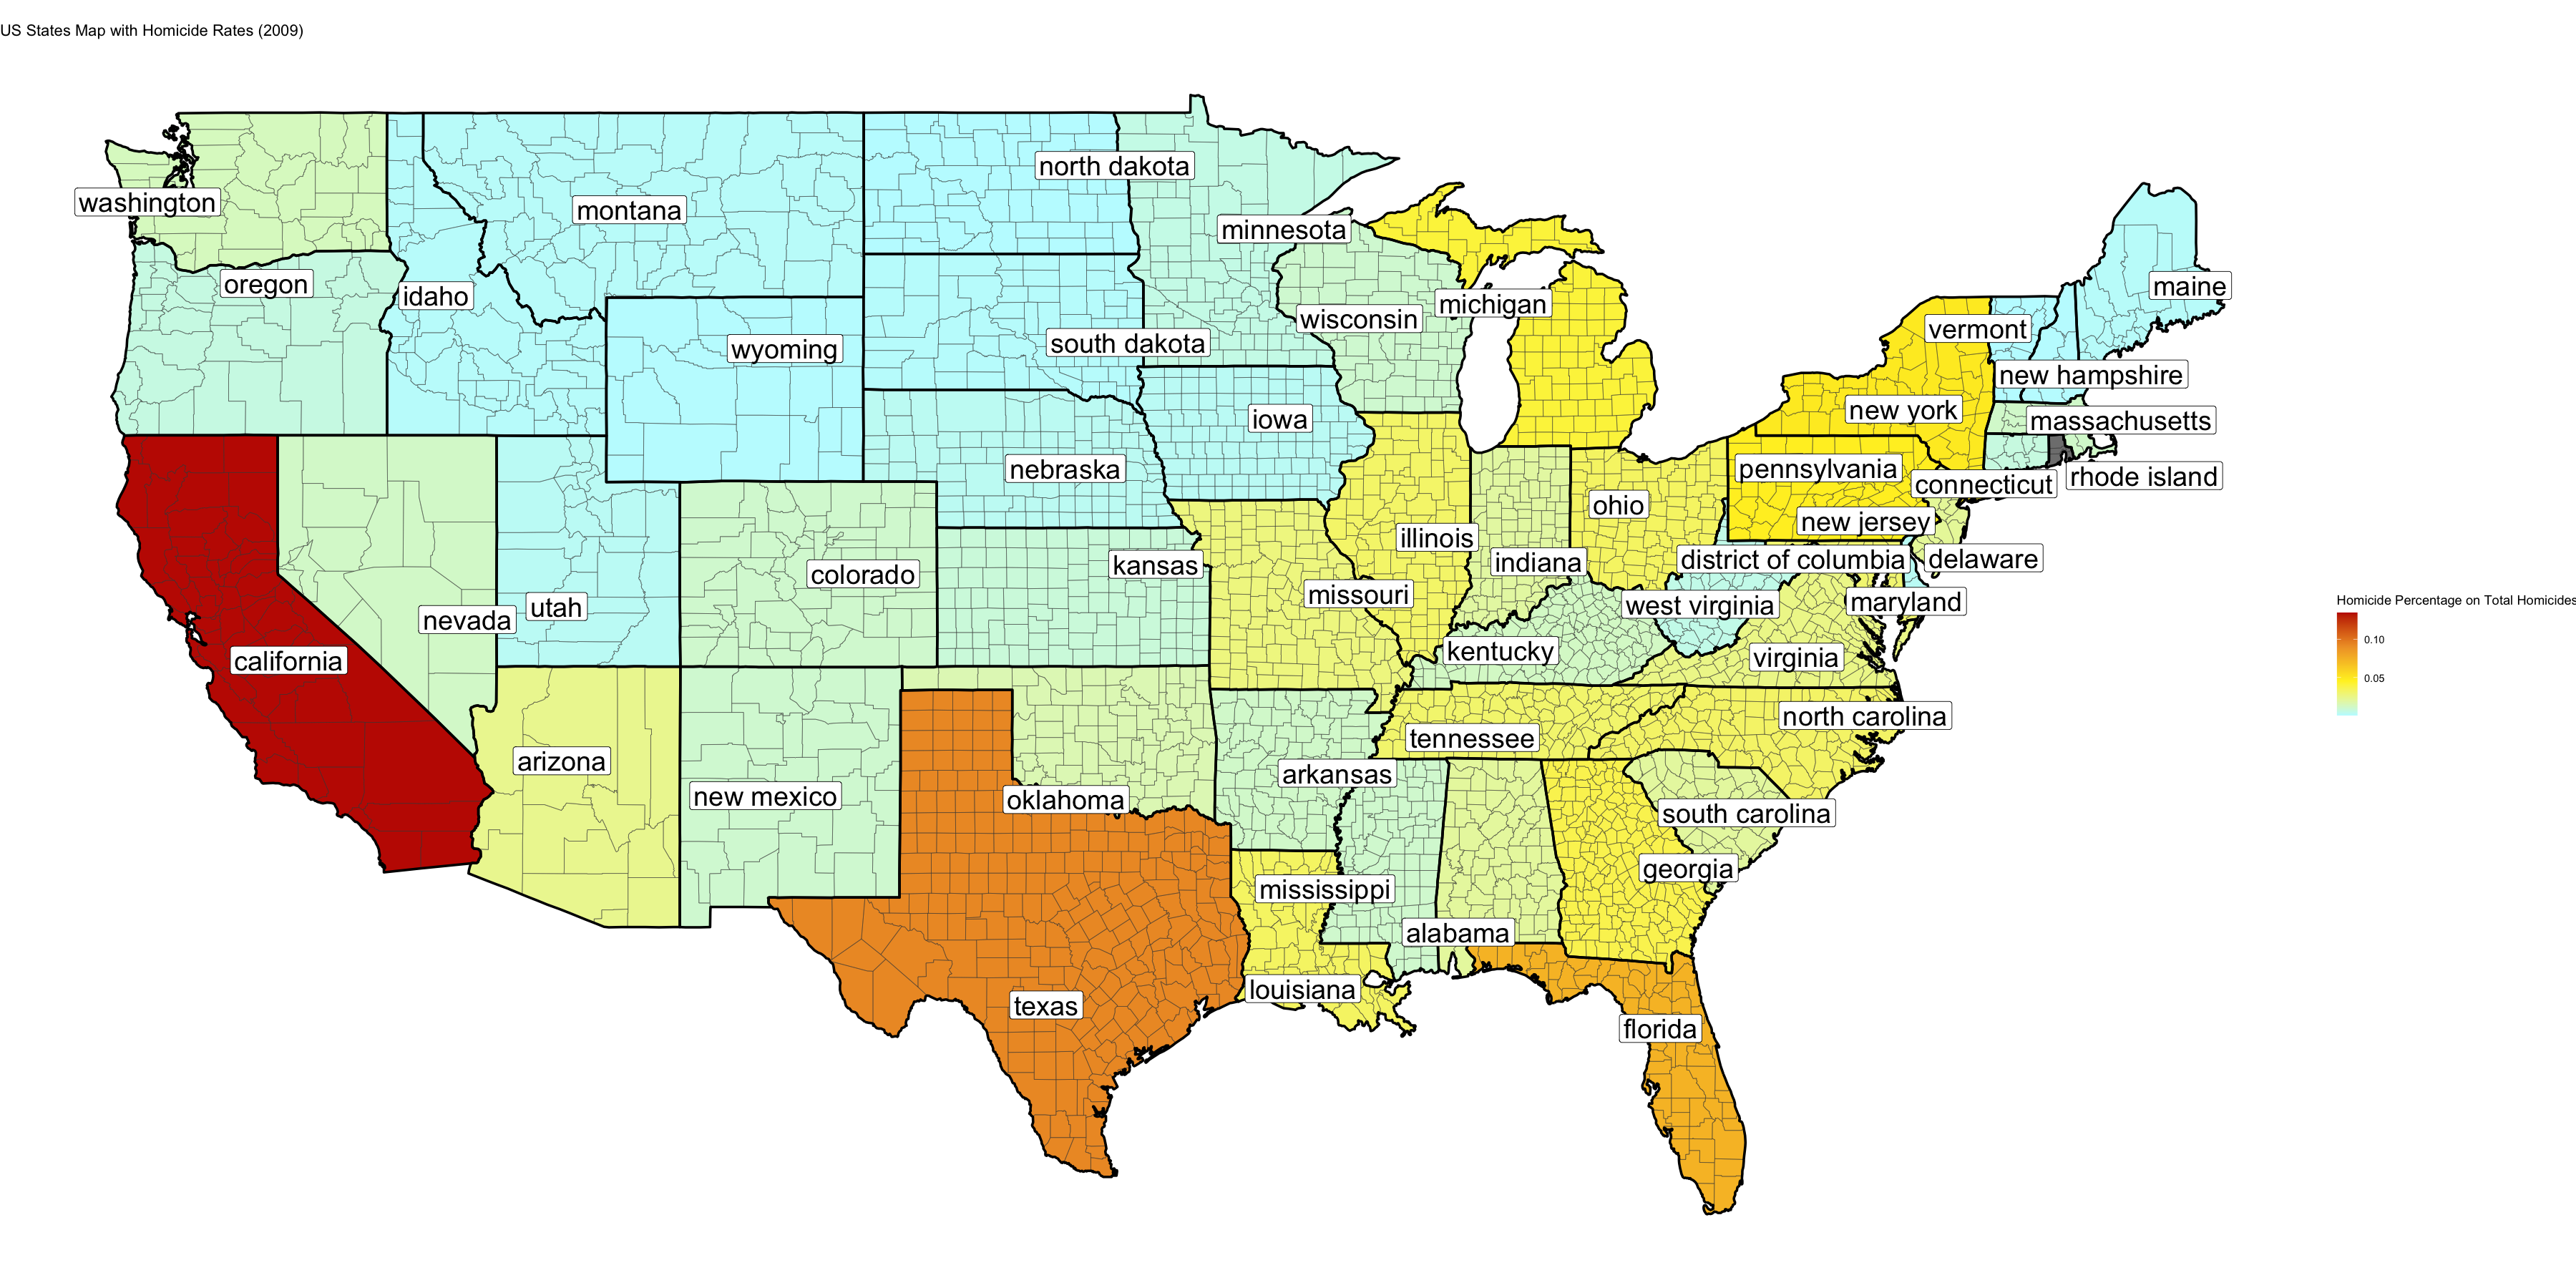

In [115]:
homicide = read.csv("homicide.csv")

# head(homicide)

homicide_2009 = homicide %>% 
    filter(Year == 2009)

# head(homicide_2009)

homicides_per_state = homicide_2009 %>%
    group_by(State) %>%
    count()

# head(homicides_per_state)

total_homicides = sum(homicides_per_state$n)
homicides_per_state$perc = homicides_per_state$n / total_homicides

head(homicides_per_state)

us_states_map$region = tolower(us_states_map$region) %>% tools::toTitleCase()

# Join the map data with the aggregated homicide data for 2009 by the 'region' column
us_states_homicide_2009 = left_join(us_states_map, homicides_per_state, by = c("region" = "State"))

# Check the result of the join
head(us_states_homicide_2009)

options(repr.plot.width = 30, repr.plot.height = 15)

ggplot() +
    geom_polygon(data = us_states_homicide_2009,
                aes(x = long, y = lat, group = group, fill = perc),
                color = "#44444487", lwd = 0.25) +
    geom_polygon(data = us_county_map,
                aes(x = long, y = lat, group = group),
                color = "#44444487", fill = NA, lwd = 0.25) +
    geom_polygon(data = us_states_map,
                aes(x = long, y = lat, group = group), 
                color = "black", fill = NA, lwd = 1) +
    scale_fill_gradientn(colours = Guillems_accessible_palette[1:4],
                        name = "Homicide Percentage on Total Homicides") +
    theme_void() +
    coord_quickmap() +
    geom_label_repel(data = state_coords, 
                    aes(x = mean_lon, y = mean_lat, label = region),
                    size = 8,
                    box.padding = 0.25,
                    point.padding = 0.5,
                    segment.color = '#5b5b5b',
                    fill = 'white',
                    color = "black") +
    labs(title = "US States Map with Homicide Rates (2009)")



Warning message:
"ggrepel: 35 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 35 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


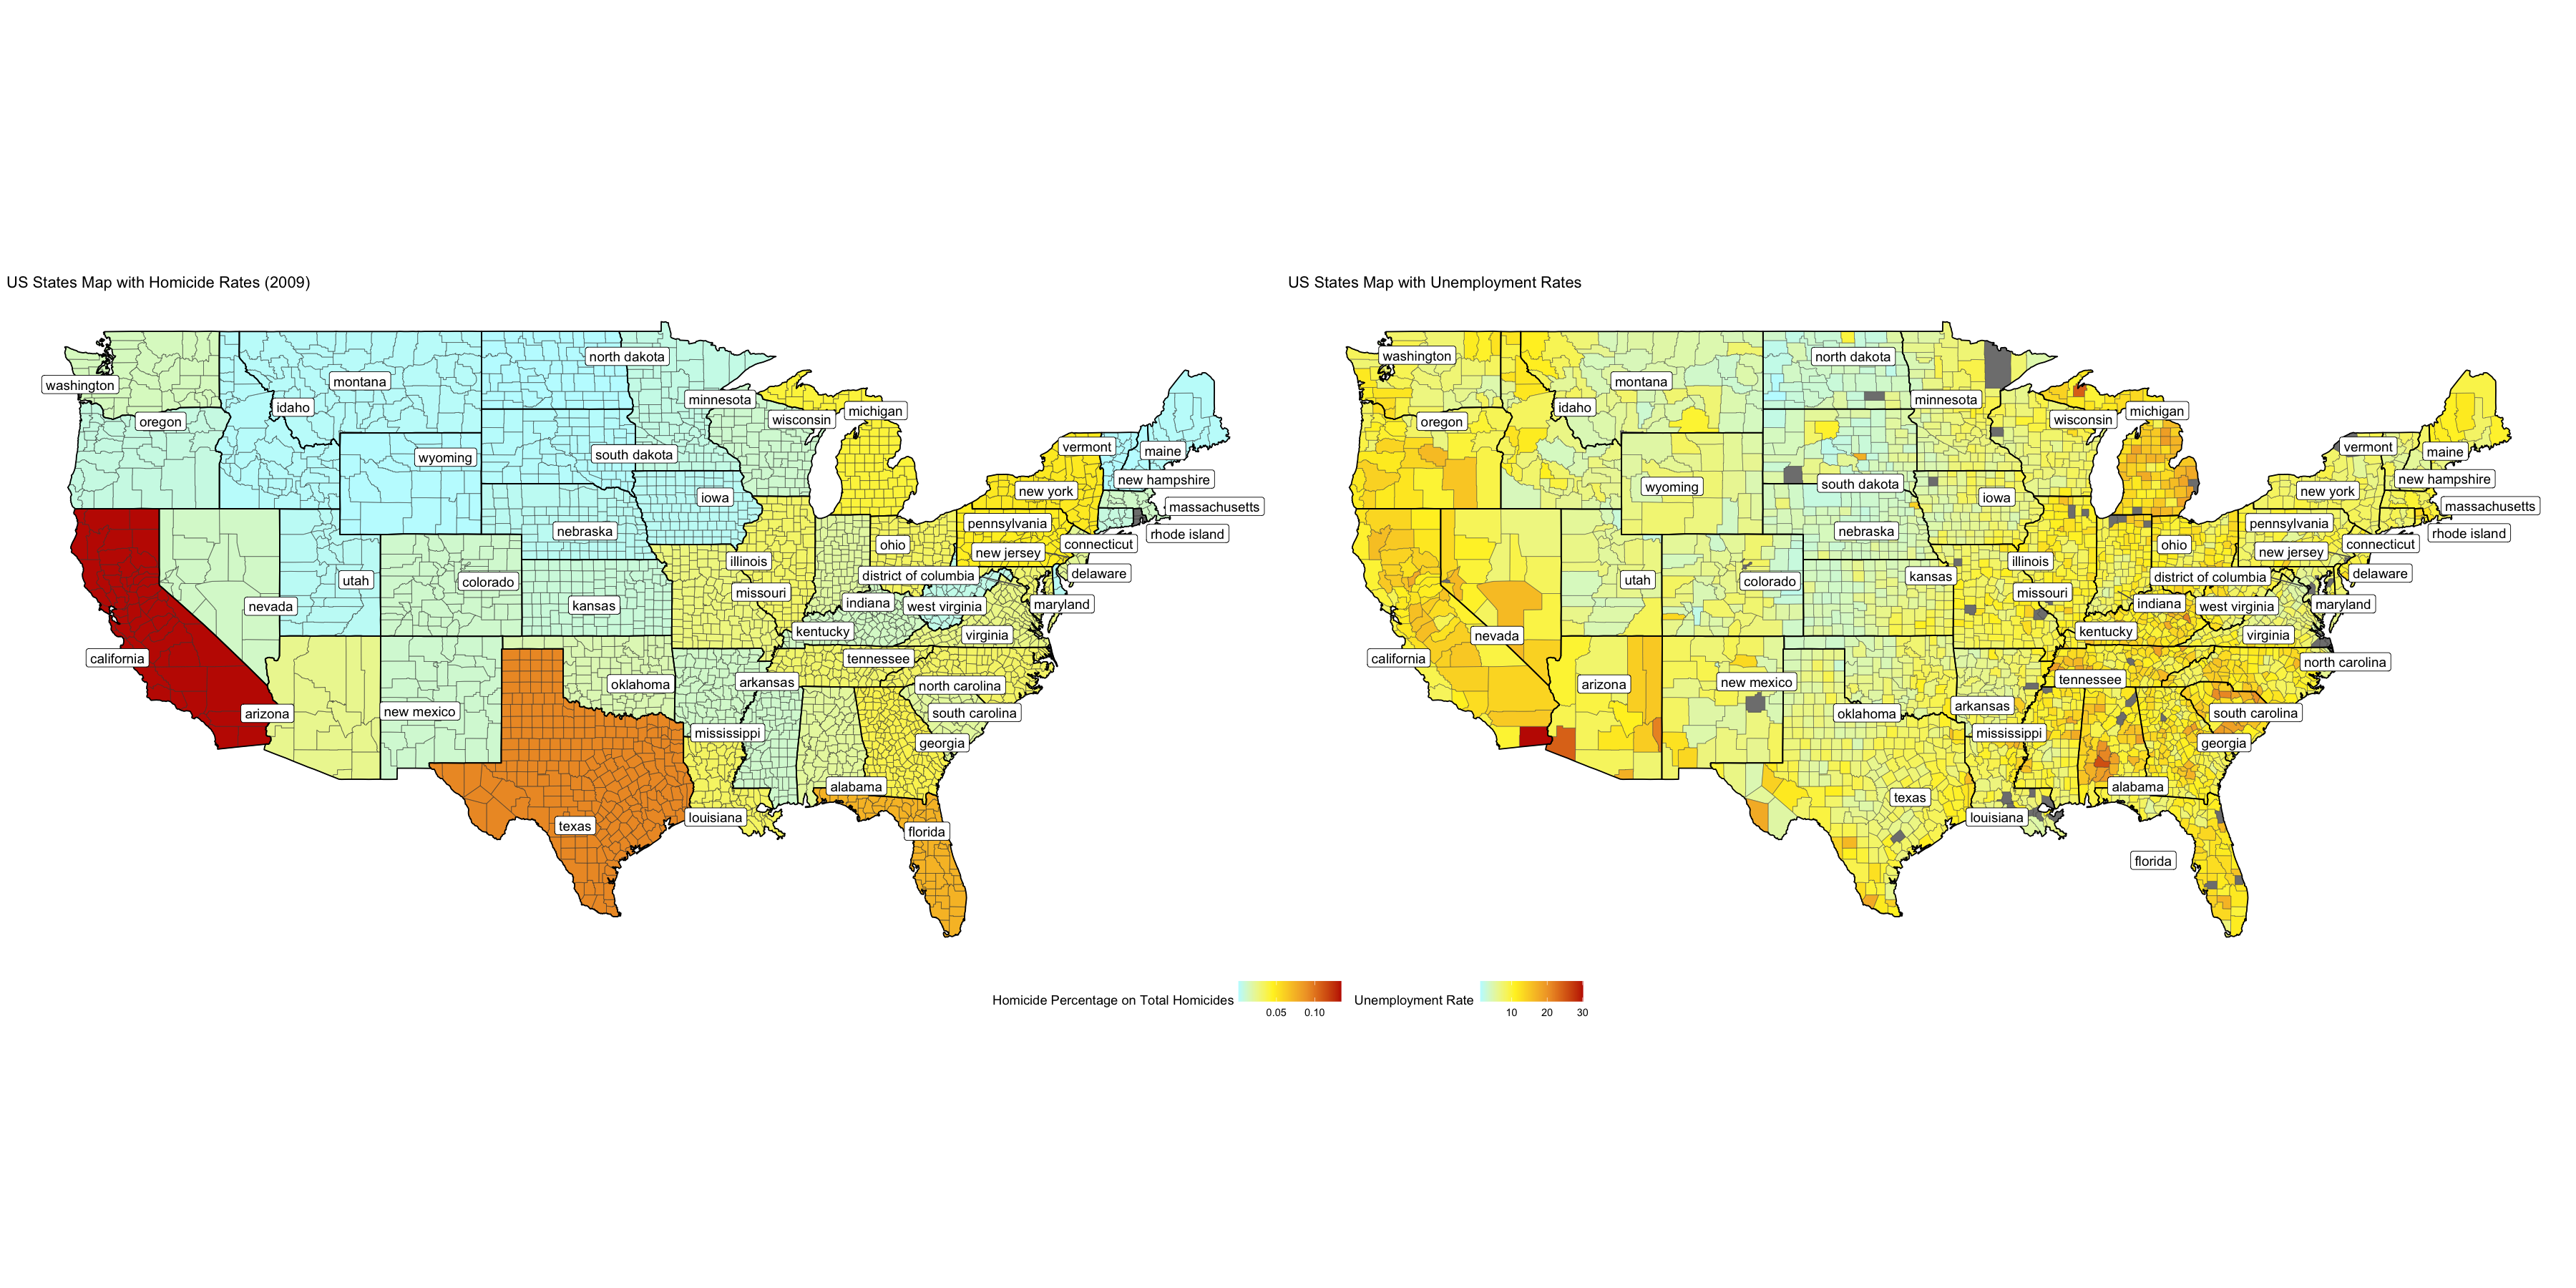

In [116]:
plot_unemployment <- ggplot() +
    geom_polygon(data = us_map_unemp,
                aes(x = long, y = lat, group = group, fill = rate),
                color = "#44444487", lwd = 0.25) +
    geom_polygon(data = us_states_map,
                aes(x = long, y = lat, group = group), 
                color = "black", fill = NA, lwd = 0.5) +
    scale_fill_gradientn(colours = Guillems_accessible_palette[1:4],
                        name = "Unemployment Rate") +
    theme_void() +
    coord_quickmap() +
    geom_label_repel(data = state_coords, 
                    aes(x = mean_lon, y = mean_lat, label = region),
                    size = 4,
                    box.padding = 0.25,
                    point.padding = 0.5,
                    segment.color = '#5b5b5b',
                    fill = 'white',
                    color = "black") +
    labs(title = "US States Map with Unemployment Rates")

plot_homicides <- ggplot() +
    geom_polygon(data = us_states_homicide_2009,
                aes(x = long, y = lat, group = group, fill = perc),
                color = "#44444487", lwd = 0.25) +
    geom_polygon(data = us_county_map,
                aes(x = long, y = lat, group = group),
                color = "#44444487", fill = NA, lwd = 0.25) +
    geom_polygon(data = us_states_map,
                aes(x = long, y = lat, group = group), 
                color = "black", fill = NA, lwd = 0.5) +
    scale_fill_gradientn(colours = Guillems_accessible_palette[1:4],
                        name = "Homicide Percentage on Total Homicides") +
    theme_void() +
    coord_quickmap() +
    geom_label_repel(data = state_coords, 
                    aes(x = mean_lon, y = mean_lat, label = region),
                    size = 4,
                    box.padding = 0.25,
                    point.padding = 0.5,
                    segment.color = '#5b5b5b',
                    fill = 'white',
                    color = "black") +
    labs(title = "US States Map with Homicide Rates (2009)")


options(repr.plot.width = 30, repr.plot.height = 15)

combined_plot <- plot_homicides + plot_unemployment + 
    plot_layout(guides = 'collect') & 
    theme(legend.position = 'bottom')

combined_plot